In [1]:
import math as mat
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
#parameters
ms = 50  #weight of the rocket shell [kg]
g = 9.81 #gravitational acceleration [m/s^2]
ρ = 1.091 #average air density [kg/m^3]
r = 0.5 #radius of the rocket [m]
ve = 325 #exhaust speed [m/s]
CD = 0.15 #drag coefficinet
mp0 = 100 #initial weight of the rocket propellant

#initial condition
h0 = 0
v0 = 0

In [3]:
def mpr(t):
    if t < 5:
        return 20
    else:
        return 0

dt = 0.1
T = 50
N = int(T/dt)+1
t = np.linspace(0.0, T, num=N)
A = mat.pi*r**2

mp = np.zeros(N)
mp[0] = mp0

for n in range (N):
    if n < 5/dt:
        mp[n] = mp0 - mpr(n*dt)*n*dt
    else:
        mp[n] = 0.0

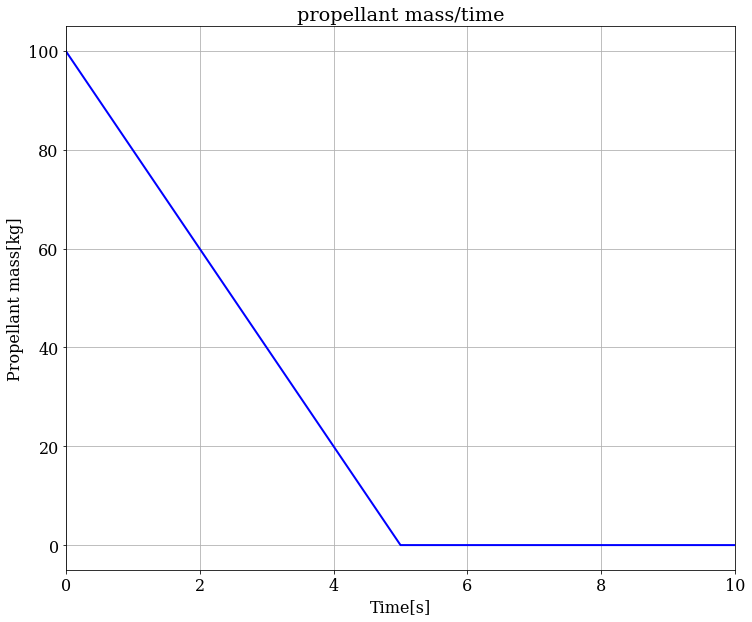

In [4]:
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=16
plt.figure(figsize=(12, 10))
plt.plot(t, mp, color='b', linestyle='-', linewidth=2)
plt.title('propellant mass/time')
plt.xlabel('Time[s]')
plt.ylabel('Propellant mass[kg]')
plt.xlim(0,10)
plt.grid()

In [5]:
def f(u):
    v = u[0]
    h = u[1]
    return np.array([-g + 1/(ms + mp[n])*ve*mpr(n*dt)-0.5*1/(ms+mp[n])*ρ*v*np.abs(v)*A*CD])

def euler_step(u, f, dt):
    u_new = u + dt * f(u)
    return u_new

u = np.empty((N, 2))
u[0] = np.array([v0, h0])

for n in range(N - 1):
    u[n + 1] = euler_step(u[n], f, dt)

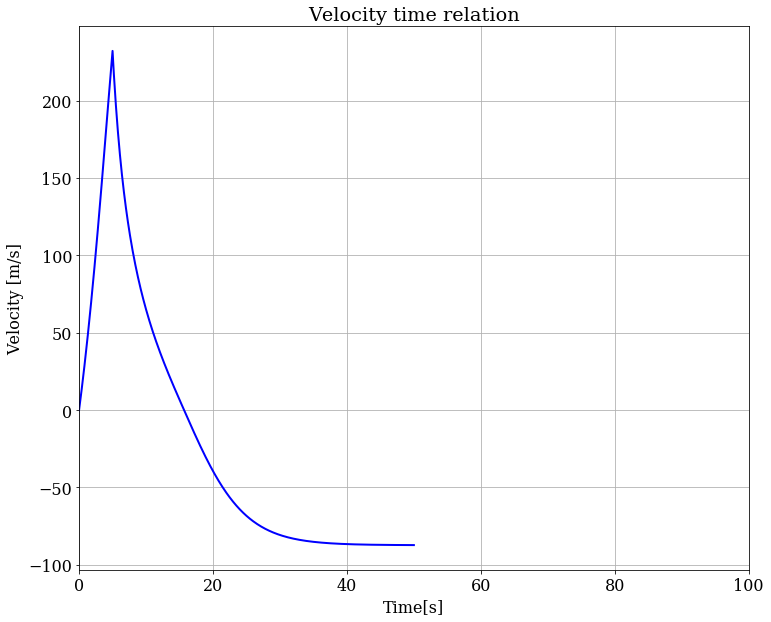

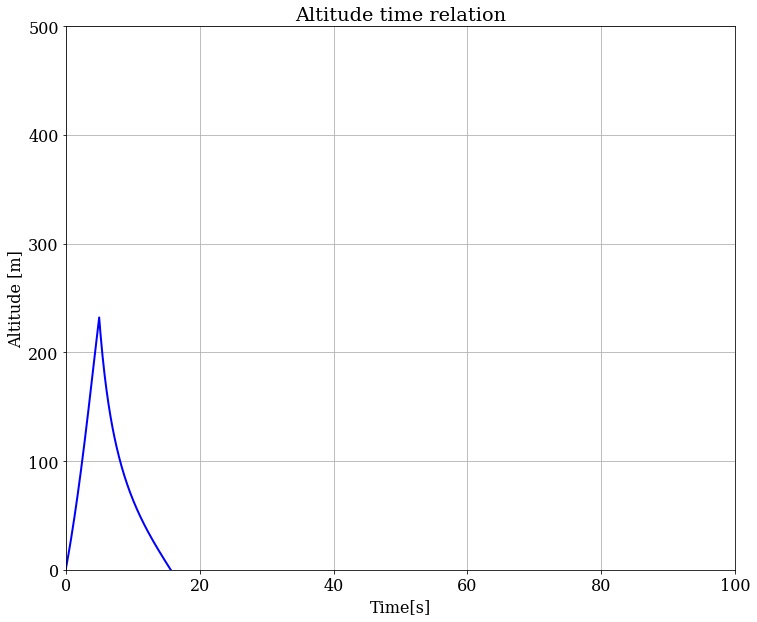

In [6]:
v = u[:,0]
h = u[:,1]

plt.figure(figsize=(12,10))
plt.plot(t,v,color='b', linestyle='-', linewidth=2)
plt.title('Velocity time relation')
plt.xlabel('Time[s]')
plt.ylabel('Velocity [m/s]')
plt.xlim(0,100)
plt.grid()


plt.figure(figsize=(12,10))
plt.plot(t,h,color='b', linestyle='-', linewidth=2)
plt.title('Altitude time relation')
plt.xlabel('Time[s]')
plt.ylabel('Altitude [m]')
plt.xlim(0,100)
plt.ylim(0, 500)
plt.grid()

